<a href="https://colab.research.google.com/github/ssujinK/SEMINAR-IN-adv.-STAT./blob/master/20191031.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
  # Colab only
  %tensorflow_version 2.x
except Exception:
  pass


TensorFlow 2.x selected.


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


## 패션 MNIST 데이터셋 임포트하기

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 탐색

모델을 훈련하기 전에 데이터셋 구조를 살펴보죠. 다음 코드는 훈련 세트에 60,000개의 이미지가 있다는 것을 보여줍니다. 각 이미지는 28x28 픽셀로 표현됩니다:

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_labels)

60000

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
len(test_labels)

10000

## 데이터 전처리

네트워크를 훈련하기 전에 데이터를 전처리해야 합니다. 훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것을 알 수 있습니다:

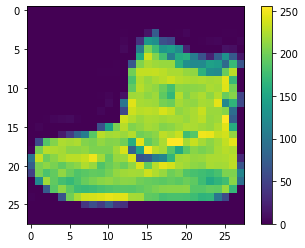

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [0]:
## 이미지 사이즈 조정

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

## 데이터 전처리

네트워크를 훈련하기 전에 데이터를 전처리해야 합니다. 훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것을 알 수 있습니다:

### 층 설정

신경망의 기본 구성 요소는 *층*(layer)입니다. 층은 주입된 데이터에서 표현을 추출합니다. 아마도 문제를 해결하는데 더 의미있는 표현이 추출될 것입니다.

대부분 딥러닝은 간단한 층을 연결하여 구성됩니다. `tf.keras.layers.Dense`와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습됩니다.

In [0]:
## 모형만들기
### tensorflow.keras 로 불러와야 사용 가능(tensorflow가 아닌 keras가 로딩되어 오류날 수 있음)

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import Sequential
model = Sequential()
model.add(Conv2D(input_shape = (28,28,1),
filters = 32,
kernel_size = (3,3),
strides = (1,1),
padding='same',
activation ='relu') )
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3211392   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,213,002
Trainable params: 3,213,002
Non-trainable params: 0
_________________________________________________________________


In [0]:
# practice

model = Sequential()

model.add(Conv2D(input_shape = (28,28,1),filters = 16,kernel_size = (5,5),
                 strides = (1,1), padding='valid', activation ='relu') )
model.add( MaxPooling2D(pool_size = (2,2), strides = (1,1), padding = 'valid') )
model.add(Conv2D(input_shape = (28,28,1),filters = 32,kernel_size = (5,5),
                 strides = (1,1), padding='valid',activation ='relu') )
model.add( MaxPooling2D(pool_size = (2,2), strides = (1,1), padding = 'valid') )
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 19, 19, 32)        12832     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 18, 18, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 10368)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               1327232   
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [0]:
# practice: 아래의 LeNet-5 코드에서 틀린 부분 찾아서 고쳐보세요.
# AveragePooing에서 strides size 없애줌

from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh'
, input_shape=(28,28,1), padding='same'))
model.add(AveragePooling2D(pool_size=2, padding='valid'))
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1),
activation='tanh'
, padding='valid'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1),
activation='tanh'
, padding='valid'))
model.add(Flatten())
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_10 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_11 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_11 (Flatten)         (None, 120)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 84)              

In [0]:
## Skip Connection Practice

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation, Conv2D, BatchNormalization, GlobalAveragePooling2D, Dropout, Dense, add
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras import regularizers
def block(n_output, upscale = False) :
  def f(x) :
    h = BatchNormalization()(x)
    h = Activation(relu)(h)
    h = Conv2D(kernel_size = 3, filters = n_output, padding = 'same')(h)
    h = BatchNormalization()(h)
    h = Activation(relu)(h)
    h = Conv2D(kernel_size = 3, filters = n_output, padding = 'same')(h)
    if upscale :
      f = Conv2D(kernel_size = 1, filters=n_output, strides=1, padding='same')(x)
    else :
      f = x
    return add([f,h])
  return f

In [0]:
## Skip Connection Practice

input_shape = (28,28,1)
input_tensor = Input(input_shape)
x = Conv2D(kernel_size = 3, filters = 16, strides = 1, padding = 'same')(input_tensor)
x = block(16)(x)
x = block(16)(x)
x = block(32, upscale = True)(x)
x = block(32)(x)
x = BatchNormalization()(x)
x = Activation(relu)(x)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(units=10, kernel_regularizer=regularizers.l2(0.01))(x)
x = Activation(softmax)(x)
model = Model(inputs=input_tensor, outputs=x)
model.summary()

# f(f(f(x)))의 형태

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_35 (Conv2D)              (None, 28, 28, 16)   160         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 28, 28, 16)   64          conv2d_35[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 28, 28, 16)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

이 네트워크의 첫 번째 층인 `tf.keras.layers.Flatten`은 2차원 배열(28 x 28 픽셀)의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환합니다. 이 층은 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 늘립니다. 이 층에는 학습되는 가중치가 없고 데이터를 변환하기만 합니다.

픽셀을 펼친 후에는 두 개의 `tf.keras.layers.Dense` 층이 연속되어 연결됩니다. 이 층을 밀집 연결(densely-connected) 또는 완전 연결(fully-connected) 층이라고 부릅니다. 첫 번째 `Dense` 층은 128개의 노드(또는 뉴런)를 가집니다. 두 번째 (마지막) 층은 10개의 노드의 *소프트맥스*(softmax) 층입니다. 이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1입니다. 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력합니다.

### 모델 컴파일

모델을 훈련하기 전에 필요한 몇 가지 설정이 모델 *컴파일* 단계에서 추가됩니다:

* *손실 함수*(Loss function)-훈련 하는 동안 모델의 오차를 측정합니다. 모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화해야 합니다.
* *옵티마이저*(Optimizer)-데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정합니다.
* *지표*(Metrics)-훈련 단계와 테스트 단계를 모니터링하기 위해 사용합니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 *정확도*를 사용합니다.

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 모델 훈련

신경망 모델을 훈련하는 단계는 다음과 같습니다:

1. 훈련 데이터를 모델에 주입합니다-이 예에서는 `train_images`와 `train_labels` 배열입니다.
2. 모델이 이미지와 레이블을 매핑하는 방법을 배웁니다.
3. 테스트 세트에 대한 모델의 예측을 만듭니다-이 예에서는 `test_images` 배열입니다. 이 예측이 `test_labels` 배열의 레이블과 맞는지 확인합니다.

훈련을 시작하기 위해 `model.fit` 메서드를 호출하면 모델이 훈련 데이터를 학습합니다:

In [0]:
model.fit(train_images, train_labels, epochs=1)

Train on 60000 samples
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.3701 - accuracy: 0.8676


## **tf.keras.layers.MaxPooling2D**


MaxPooling2D(pool_size = pool 하는 차원지정 ex: (2,2) ,  
strides = 몇 칸씩 이동시킬지?  
padding = “valid” or “same”(go with 0 padding)
    # valid는 무시하고 넘어감, same은 무시하지 않음 
data_format = “channels_last”, “channels_first”)  

# **HW 3**

#### 1. Fashion Mnist 데이터를 잘 적합시키는 CNN 기반 모형 찾기
https://www.tensorflow.org/tutorials/keras/classification
#### 2. Mnist 데이터를 잘 적합시키는 CNN 기반 모형 찾기
https://www.tensorflow.org/tutorials/quickstart/beginner
  

competition의 관심있는 technical paper 찾아보기